In [1]:
# From this point on merging the Adverse Effects API 
# The following APIs include all data to the nearest 1000th entry using skips 
# Set to the largest possible parameters allowed per the query in its construction


In [10]:
################################
# THIS QUERY TAKES A LONG TIME #
################################

import pandas as pd
import requests

# Base API URL
base_url = "https://api.fda.gov/drug/event.json"
limit = 1000  # Records per request
skip = 0  # Pagination offset
all_data = []

# Loop to fetch data in batches
while True:
    # Fetch data with pagination parameters
    url = f"{base_url}?limit={limit}&skip={skip}"
    response = requests.get(url)
    results = response.json().get('results', [])
    
    if not results:  # Exit loop if no more data
        break
    
    # Process each record in the results
    for record in results:
        patient = record.get("patient", {})

        # Extract 'occurcountry', 'seriousnessdeath', and 'receivedate'
        occurcountry = record.get("occurcountry")
        seriousnessdeath = record.get("seriousnessdeath")
        receivedate = record.get("receivedate")  # Add receivedate from the main record

        # Extract fields from 'patient.drug' (only the first drug entry for simplicity)
        first_drug = patient.get("drug", [{}])[0]
        medicinalproduct = first_drug.get("medicinalproduct")
        drugadministrationroute = first_drug.get("drugadministrationroute")
        generic_name = first_drug.get("openfda", {}).get("generic_name", [None])[0]
        
        # Extract patient-level fields
        patientsex = patient.get("patientsex")
        patientweight = patient.get("patientweight")
        patientagegroup = patient.get("patientagegroup")
        
        # Extract fields from 'patient.reaction' (only the first reaction entry for simplicity)
        first_reaction = patient.get("reaction", [{}])[0]
        reactionmeddrapt = first_reaction.get("reactionmeddrapt")
        reactionoutcome = first_reaction.get("reactionoutcome")

        # Store extracted fields in a dictionary as separate columns
        data_row = {
            "occurcountry": occurcountry,
            "seriousnessdeath": seriousnessdeath,
            "receivedate": receivedate,  # Add receivedate to data row
            "medicinalproduct": medicinalproduct,
            "drugadministrationroute": drugadministrationroute,
            "generic_name": generic_name,
            "patientsex": patientsex,
            "patientweight": patientweight,
            "patientagegroup": patientagegroup,
            "reactionmeddrapt": reactionmeddrapt,
            "reactionoutcome": reactionoutcome
        }
        
        all_data.append(data_row)
    
    skip += limit  # Update pagination offset for the next batch

# Convert to DataFrame
df_adverse_effects = pd.DataFrame(all_data)
df_adverse_effects


,occurcountry,seriousnessdeath,receivedate,medicinalproduct,drugadministrationroute,generic_name,patientsex,patientweight,patientagegroup,reactionmeddrapt,reactionoutcome
0,None,1,20080707,DURAGESIC-100,041,None,1,None,None,DRUG ADMINISTRATION ERROR,None
1,None,None,20140306,BONIVA,042,None,2,None,None,Vomiting,None
2,None,None,20140228,IBUPROFEN,None,IBUPROFEN,2,None,None,Dyspepsia,None
3,US,None,20140312,LYRICA,None,PREGABALIN,1,None,None,Drug ineffective,6
4,US,None,20140312,DOXYCYCLINE HYCLATE,None,DOXYCYCLINE HYCLATE,2,None,None,Drug hypersensitivity,6
...,...,...,...,...,...,...,...,...,...,...,...
25995,US,None,20140322,AVASTIN,042,BEVACIZUMAB,2,54.48,None,Cell marker increased,3
25996,US,None,20140322,PROLIA,065,DENOSUMAB,2,None,None,Tooth abscess,6
25997,CN,None,20140322,ZADAXIN,058,None,2,60,None,Weight decreased,2
25998,CL,None,20140322,PEGASYS,058,PEGINTERFERON ALFA-2A,2,62,None,Viral load increased,3


In [11]:
# Rename columns
df_adverse_effects.rename(columns={
    "occurcountry": "Country of Occurrence",
    "seriousnessdeath": "Death",
    "receivedate": "Report Date",  # Needed to be added for last vizualization
    "medicinalproduct": "Medicinal Product",
    "drugadministrationroute": "Drug Administration Route",
    "generic_name": "Generic Name",
    "patientsex": "Patient Sex",
    "patientweight": "Patient Weight",
    "patientagegroup": "Patient Age Group",
    "reactionmeddrapt": "Patient Reaction (MedDRA Term)",  # MedDRA = standardized medical terminology
    "reactionoutcome": "Reaction Outcome"  # Explanation from API documentation
}, inplace=True)

# Display the DataFrame
df_adverse_effects


,Country of Occurrence,Death,Report Date,Medicinal Product,Drug Administration Route,Generic Name,Patient Sex,Patient Weight,Patient Age Group,Patient Reaction (MedDRA Term),Reaction Outcome
0,None,1,20080707,DURAGESIC-100,041,None,1,None,None,DRUG ADMINISTRATION ERROR,None
1,None,None,20140306,BONIVA,042,None,2,None,None,Vomiting,None
2,None,None,20140228,IBUPROFEN,None,IBUPROFEN,2,None,None,Dyspepsia,None
3,US,None,20140312,LYRICA,None,PREGABALIN,1,None,None,Drug ineffective,6
4,US,None,20140312,DOXYCYCLINE HYCLATE,None,DOXYCYCLINE HYCLATE,2,None,None,Drug hypersensitivity,6
...,...,...,...,...,...,...,...,...,...,...,...
25995,US,None,20140322,AVASTIN,042,BEVACIZUMAB,2,54.48,None,Cell marker increased,3
25996,US,None,20140322,PROLIA,065,DENOSUMAB,2,None,None,Tooth abscess,6
25997,CN,None,20140322,ZADAXIN,058,None,2,60,None,Weight decreased,2
25998,CL,None,20140322,PEGASYS,058,PEGINTERFERON ALFA-2A,2,62,None,Viral load increased,3


In [12]:
# Base API URL for FDA Drug Enforcement Report API
base_url = "https://api.fda.gov/drug/enforcement.json"
limit = 1000  # Records per request
skip = 0  # Pagination offset
all_data = []

# Loop to fetch data in batches
while True:
    # Fetch data with pagination parameters
    url = f"{base_url}?limit={limit}&skip={skip}"
    response = requests.get(url)
    results = response.json().get('results', [])
    
    if not results:  # Exit loop if no more data
        break
    
    # Process each record in the results
    for record in results:
        # Extract fields directly from the record
        recalling_firm = record.get("recalling_firm")
        classification = record.get("classification")
        status = record.get("status")
        distribution_pattern = record.get("distribution_pattern")
        product_description = record.get("product_description")
        code_info = record.get("code_info")
        reason_for_recall = record.get("reason_for_recall")
        product_quantity = record.get("product_quantity")
        voluntary_mandated = record.get("voluntary_mandated")
        report_date = record.get("report_date")
        recall_initiation_date = record.get("recall_initiation_date")
        initial_firm_notification = record.get("initial_firm_notification")
        recall_number = record.get("recall_number")
        event_id = record.get("event_id")
        product_type = record.get("product_type")
        
        # Geographic data
        city = record.get("city")
        state = record.get("state")
        country = record.get("country")
        
        # Extract 'generic_name' from the nested 'openfda' dictionary
        generic_name = record.get("openfda", {}).get("generic_name", [None])[0]  # Use [0] to get the first item if it's a list

        # Store extracted fields in a dictionary as separate columns
        data_row = {
            "recalling_firm": recalling_firm,
            "classification": classification,
            "status": status,
            "distribution_pattern": distribution_pattern,
            "product_description": product_description,
            "code_info": code_info,
            "reason_for_recall": reason_for_recall,
            "product_quantity": product_quantity,
            "voluntary_mandated": voluntary_mandated,
            "report_date": report_date,
            "recall_initiation_date": recall_initiation_date,
            "initial_firm_notification": initial_firm_notification,
            "recall_number": recall_number,
            "event_id": event_id,
            "product_type": product_type,
            "city": city,
            "state": state,
            "country": country,
            "generic_name": generic_name
        }
        
        all_data.append(data_row)
    
    skip += limit

# Convert to DataFrame
df_enforcement = pd.DataFrame(all_data)
df_enforcement


,recalling_firm,classification,status,distribution_pattern,product_description,code_info,reason_for_recall,product_quantity,voluntary_mandated,report_date,recall_initiation_date,initial_firm_notification,recall_number,event_id,product_type,city,state,country,generic_name
0,"Kalman Health & Wellness, Inc. dba Essential W...",Class II,Terminated,Nationwide,"Progesterone 100 mg/mL in Corn Oil Injection, ...","Lot #: 072915, Exp 10/29/2015",Lack of Assurance of Sterility: A recall of a...,1 vial,Voluntary: Firm initiated,20151125,20150903,Letter,D-321-2016,72241,Drugs,Peoria,IL,United States,None
1,Albek De Mexico S.A. De C.V.,Class II,Ongoing,USA Nationwide,Assured Instant Hand Sanitizer Aloe & Moisturi...,1931102AL,CGMP Deviations: Next Advanced Antibacterial H...,"27,000 bottles",Voluntary: Firm initiated,20201125,20200730,Press Release,D-0080-2021,86162,Drugs,San Juan Del Rio,N/A,Mexico,None
2,Teva Pharmaceuticals USA,Class II,Terminated,Nationwide within the United State and Puerto ...,"Dextroamphetamine Saccharate, Amphetamine Aspa...","Lot #: 42614718, Exp. date 02/2021",Some bottles may contain mixed strengths of th...,"33,280 bottles",Voluntary: Firm initiated,20200610,20200522,Letter,D-1285-2020,85712,Drugs,Parsippany,NJ,United States,"DEXTROAMPHETAMINE SACCHARATE, AMPHETAMINE ASPA..."
3,Perrigo Company PLC,Class II,Terminated,Nationwide in the USA,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","Batch: 1BK0964, Exp 01/31/2023",CGMP Deviations: Products were manufactured wi...,"1,560 bottles",Voluntary: Firm initiated,20220302,20211026,Letter,D-0623-2022,88905,Drugs,Allegan,MI,United States,OXYMETAZOLINE HCL
4,"Pharmedium Services, LLC",Class II,Terminated,Nationwide,2 mcg/mL Fentanyl Citrate and 0.16% Bupivacain...,"Lot Number 160380168M , Exp. Date 5/8/2016 ; ...",Presence of Particulate Matter: API contaminat...,940 bags,Voluntary: Firm initiated,20160727,20160505,E-Mail,D-1398-2016,74057,Drugs,Lake Forest,IL,United States,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,Teva Pharmaceuticals USA,Class III,Terminated,Nationwide in the USA and Puerto Rico,"Methylphenidate Hydrochloride Tablets USP, 20 ...","Lot Number # 1156086M, Exp 08/18",Failed Dissolution Specifications: Low out of ...,"58,292 bottles",Voluntary: Firm initiated,20171101,20171017,Letter,D-0052-2018,78308,Drugs,North Wales,PA,United States,None
16464,"Washington Homeopathic Products, Inc.",Class II,Terminated,Distributed Nationwide in the USA,"ZTE 1015 Formula, Contents 1000 ml, For Manufa...","Lot # 25739, no expiry date",Out-of-specification test results obtained for...,1 1/liter,Voluntary: Firm initiated,20211006,20210820,Letter,D-0888-2021,88528,Drugs,Berkeley Springs,WV,United States,None
16465,Watson Laboratories Inc,Class II,Terminated,Nationwide,ZARAH¿ Drospirenone/ Ethinyl Estradiol Tablets...,Lot #s: 401536AA/401536A; 401537AA/401537/A; 4...,Failed Tablet/Capsule Specification; tablet br...,"136,720 cartons",Voluntary: Firm initiated,20130327,20130213,Letter,D-205-2013,64358,Drugs,Corona,CA,United States,None
16466,Clinical Specialties Compounding Pharmacy,Class II,Terminated,"FL, GA and SC.","Test cyp 35 mg/ml, Clinical Specialties Compou...","Lot number CABDCAAC:13, Exp date: 8/19/2013.",Lack of Assurance of Sterility: FDA inspection...,12ml,Voluntary: Firm initiated,20130710,20130320,Telephone,D-672-2013,64661,Drugs,Augusta,GA,United States,None


In [13]:
df_enforcement = df_enforcement[
    (df_enforcement['country'] == 'United States')
]
df_enforcement

,recalling_firm,classification,status,distribution_pattern,product_description,code_info,reason_for_recall,product_quantity,voluntary_mandated,report_date,recall_initiation_date,initial_firm_notification,recall_number,event_id,product_type,city,state,country,generic_name
0,"Kalman Health & Wellness, Inc. dba Essential W...",Class II,Terminated,Nationwide,"Progesterone 100 mg/mL in Corn Oil Injection, ...","Lot #: 072915, Exp 10/29/2015",Lack of Assurance of Sterility: A recall of a...,1 vial,Voluntary: Firm initiated,20151125,20150903,Letter,D-321-2016,72241,Drugs,Peoria,IL,United States,None
2,Teva Pharmaceuticals USA,Class II,Terminated,Nationwide within the United State and Puerto ...,"Dextroamphetamine Saccharate, Amphetamine Aspa...","Lot #: 42614718, Exp. date 02/2021",Some bottles may contain mixed strengths of th...,"33,280 bottles",Voluntary: Firm initiated,20200610,20200522,Letter,D-1285-2020,85712,Drugs,Parsippany,NJ,United States,"DEXTROAMPHETAMINE SACCHARATE, AMPHETAMINE ASPA..."
3,Perrigo Company PLC,Class II,Terminated,Nationwide in the USA,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","Batch: 1BK0964, Exp 01/31/2023",CGMP Deviations: Products were manufactured wi...,"1,560 bottles",Voluntary: Firm initiated,20220302,20211026,Letter,D-0623-2022,88905,Drugs,Allegan,MI,United States,OXYMETAZOLINE HCL
4,"Pharmedium Services, LLC",Class II,Terminated,Nationwide,2 mcg/mL Fentanyl Citrate and 0.16% Bupivacain...,"Lot Number 160380168M , Exp. Date 5/8/2016 ; ...",Presence of Particulate Matter: API contaminat...,940 bags,Voluntary: Firm initiated,20160727,20160505,E-Mail,D-1398-2016,74057,Drugs,Lake Forest,IL,United States,None
5,Pfizer Inc.,Class III,Terminated,Nationwide and Puerto Rico,"VIRACEPT (R) (nelfinavir mesylate) Tablets, 62...","Lot H45241, exp. 11/16",Labeling: Incorrect or missing lot and or Exp ...,1200 tablets,Voluntary: Firm initiated,20140723,20140708,Letter,D-1443-2014,68660,Drugs,New York,NY,United States,NELFINAVIR MESYLATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,Teva Pharmaceuticals USA,Class III,Terminated,Nationwide in the USA and Puerto Rico,"Methylphenidate Hydrochloride Tablets USP, 20 ...","Lot Number # 1156086M, Exp 08/18",Failed Dissolution Specifications: Low out of ...,"58,292 bottles",Voluntary: Firm initiated,20171101,20171017,Letter,D-0052-2018,78308,Drugs,North Wales,PA,United States,None
16464,"Washington Homeopathic Products, Inc.",Class II,Terminated,Distributed Nationwide in the USA,"ZTE 1015 Formula, Contents 1000 ml, For Manufa...","Lot # 25739, no expiry date",Out-of-specification test results obtained for...,1 1/liter,Voluntary: Firm initiated,20211006,20210820,Letter,D-0888-2021,88528,Drugs,Berkeley Springs,WV,United States,None
16465,Watson Laboratories Inc,Class II,Terminated,Nationwide,ZARAH¿ Drospirenone/ Ethinyl Estradiol Tablets...,Lot #s: 401536AA/401536A; 401537AA/401537/A; 4...,Failed Tablet/Capsule Specification; tablet br...,"136,720 cartons",Voluntary: Firm initiated,20130327,20130213,Letter,D-205-2013,64358,Drugs,Corona,CA,United States,None
16466,Clinical Specialties Compounding Pharmacy,Class II,Terminated,"FL, GA and SC.","Test cyp 35 mg/ml, Clinical Specialties Compou...","Lot number CABDCAAC:13, Exp date: 8/19/2013.",Lack of Assurance of Sterility: FDA inspection...,12ml,Voluntary: Firm initiated,20130710,20130320,Telephone,D-672-2013,64661,Drugs,Augusta,GA,United States,None


In [14]:
df_enforcement = df_enforcement[
    (df_enforcement['product_type'] == 'Drugs')
]
df_enforcement

,recalling_firm,classification,status,distribution_pattern,product_description,code_info,reason_for_recall,product_quantity,voluntary_mandated,report_date,recall_initiation_date,initial_firm_notification,recall_number,event_id,product_type,city,state,country,generic_name
0,"Kalman Health & Wellness, Inc. dba Essential W...",Class II,Terminated,Nationwide,"Progesterone 100 mg/mL in Corn Oil Injection, ...","Lot #: 072915, Exp 10/29/2015",Lack of Assurance of Sterility: A recall of a...,1 vial,Voluntary: Firm initiated,20151125,20150903,Letter,D-321-2016,72241,Drugs,Peoria,IL,United States,None
2,Teva Pharmaceuticals USA,Class II,Terminated,Nationwide within the United State and Puerto ...,"Dextroamphetamine Saccharate, Amphetamine Aspa...","Lot #: 42614718, Exp. date 02/2021",Some bottles may contain mixed strengths of th...,"33,280 bottles",Voluntary: Firm initiated,20200610,20200522,Letter,D-1285-2020,85712,Drugs,Parsippany,NJ,United States,"DEXTROAMPHETAMINE SACCHARATE, AMPHETAMINE ASPA..."
3,Perrigo Company PLC,Class II,Terminated,Nationwide in the USA,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","Batch: 1BK0964, Exp 01/31/2023",CGMP Deviations: Products were manufactured wi...,"1,560 bottles",Voluntary: Firm initiated,20220302,20211026,Letter,D-0623-2022,88905,Drugs,Allegan,MI,United States,OXYMETAZOLINE HCL
4,"Pharmedium Services, LLC",Class II,Terminated,Nationwide,2 mcg/mL Fentanyl Citrate and 0.16% Bupivacain...,"Lot Number 160380168M , Exp. Date 5/8/2016 ; ...",Presence of Particulate Matter: API contaminat...,940 bags,Voluntary: Firm initiated,20160727,20160505,E-Mail,D-1398-2016,74057,Drugs,Lake Forest,IL,United States,None
5,Pfizer Inc.,Class III,Terminated,Nationwide and Puerto Rico,"VIRACEPT (R) (nelfinavir mesylate) Tablets, 62...","Lot H45241, exp. 11/16",Labeling: Incorrect or missing lot and or Exp ...,1200 tablets,Voluntary: Firm initiated,20140723,20140708,Letter,D-1443-2014,68660,Drugs,New York,NY,United States,NELFINAVIR MESYLATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,Teva Pharmaceuticals USA,Class III,Terminated,Nationwide in the USA and Puerto Rico,"Methylphenidate Hydrochloride Tablets USP, 20 ...","Lot Number # 1156086M, Exp 08/18",Failed Dissolution Specifications: Low out of ...,"58,292 bottles",Voluntary: Firm initiated,20171101,20171017,Letter,D-0052-2018,78308,Drugs,North Wales,PA,United States,None
16464,"Washington Homeopathic Products, Inc.",Class II,Terminated,Distributed Nationwide in the USA,"ZTE 1015 Formula, Contents 1000 ml, For Manufa...","Lot # 25739, no expiry date",Out-of-specification test results obtained for...,1 1/liter,Voluntary: Firm initiated,20211006,20210820,Letter,D-0888-2021,88528,Drugs,Berkeley Springs,WV,United States,None
16465,Watson Laboratories Inc,Class II,Terminated,Nationwide,ZARAH¿ Drospirenone/ Ethinyl Estradiol Tablets...,Lot #s: 401536AA/401536A; 401537AA/401537/A; 4...,Failed Tablet/Capsule Specification; tablet br...,"136,720 cartons",Voluntary: Firm initiated,20130327,20130213,Letter,D-205-2013,64358,Drugs,Corona,CA,United States,None
16466,Clinical Specialties Compounding Pharmacy,Class II,Terminated,"FL, GA and SC.","Test cyp 35 mg/ml, Clinical Specialties Compou...","Lot number CABDCAAC:13, Exp date: 8/19/2013.",Lack of Assurance of Sterility: FDA inspection...,12ml,Voluntary: Firm initiated,20130710,20130320,Telephone,D-672-2013,64661,Drugs,Augusta,GA,United States,None


In [15]:
# Rename columns
df_enforcement.rename(columns={
    "recalling_firm": "Recalling Firm",
    "classification": "Classification",
    "status": "Status",
    "distribution_pattern": "Distribution Pattern",
    "product_description": "Product Description",
    "code_info": "Code Info",
    "reason_for_recall": "Reason For Recall",
    "product_quantity": "Product Quantity",
    "voluntary_mandated": "Voluntary or Mandated",
    "report_date": "Report Date",
    "recall_initiation_date": "Recall Initiation Date",
    "initial_firm_notification": "Initial Firm Notification",
    "recall_number": "Recall Number",
    "event_id": "Event ID",
    "product_type": "Product Type",
    "city": "City",
    "state": "State",
    "country": "Country",
    "generic_name": "Generic Name"
}, inplace=True)

# Reorder columns to place 'Generic_Name' first
columns = ["Generic Name"] + [col for col in df_enforcement.columns if col != "Generic Name"]
df_enforcement = df_enforcement[columns]

# Display the reordered DataFrame
df_enforcement = df_enforcement.reset_index(drop=True)
df_enforcement


,Generic Name,Recalling Firm,Classification,Status,Distribution Pattern,Product Description,Code Info,Reason For Recall,Product Quantity,Voluntary or Mandated,Report Date,Recall Initiation Date,Initial Firm Notification,Recall Number,Event ID,Product Type,City,State,Country
0,None,"Kalman Health & Wellness, Inc. dba Essential W...",Class II,Terminated,Nationwide,"Progesterone 100 mg/mL in Corn Oil Injection, ...","Lot #: 072915, Exp 10/29/2015",Lack of Assurance of Sterility: A recall of a...,1 vial,Voluntary: Firm initiated,20151125,20150903,Letter,D-321-2016,72241,Drugs,Peoria,IL,United States
1,"DEXTROAMPHETAMINE SACCHARATE, AMPHETAMINE ASPA...",Teva Pharmaceuticals USA,Class II,Terminated,Nationwide within the United State and Puerto ...,"Dextroamphetamine Saccharate, Amphetamine Aspa...","Lot #: 42614718, Exp. date 02/2021",Some bottles may contain mixed strengths of th...,"33,280 bottles",Voluntary: Firm initiated,20200610,20200522,Letter,D-1285-2020,85712,Drugs,Parsippany,NJ,United States
2,OXYMETAZOLINE HCL,Perrigo Company PLC,Class II,Terminated,Nationwide in the USA,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","Batch: 1BK0964, Exp 01/31/2023",CGMP Deviations: Products were manufactured wi...,"1,560 bottles",Voluntary: Firm initiated,20220302,20211026,Letter,D-0623-2022,88905,Drugs,Allegan,MI,United States
3,None,"Pharmedium Services, LLC",Class II,Terminated,Nationwide,2 mcg/mL Fentanyl Citrate and 0.16% Bupivacain...,"Lot Number 160380168M , Exp. Date 5/8/2016 ; ...",Presence of Particulate Matter: API contaminat...,940 bags,Voluntary: Firm initiated,20160727,20160505,E-Mail,D-1398-2016,74057,Drugs,Lake Forest,IL,United States
4,NELFINAVIR MESYLATE,Pfizer Inc.,Class III,Terminated,Nationwide and Puerto Rico,"VIRACEPT (R) (nelfinavir mesylate) Tablets, 62...","Lot H45241, exp. 11/16",Labeling: Incorrect or missing lot and or Exp ...,1200 tablets,Voluntary: Firm initiated,20140723,20140708,Letter,D-1443-2014,68660,Drugs,New York,NY,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15552,None,Teva Pharmaceuticals USA,Class III,Terminated,Nationwide in the USA and Puerto Rico,"Methylphenidate Hydrochloride Tablets USP, 20 ...","Lot Number # 1156086M, Exp 08/18",Failed Dissolution Specifications: Low out of ...,"58,292 bottles",Voluntary: Firm initiated,20171101,20171017,Letter,D-0052-2018,78308,Drugs,North Wales,PA,United States
15553,None,"Washington Homeopathic Products, Inc.",Class II,Terminated,Distributed Nationwide in the USA,"ZTE 1015 Formula, Contents 1000 ml, For Manufa...","Lot # 25739, no expiry date",Out-of-specification test results obtained for...,1 1/liter,Voluntary: Firm initiated,20211006,20210820,Letter,D-0888-2021,88528,Drugs,Berkeley Springs,WV,United States
15554,None,Watson Laboratories Inc,Class II,Terminated,Nationwide,ZARAH¿ Drospirenone/ Ethinyl Estradiol Tablets...,Lot #s: 401536AA/401536A; 401537AA/401537/A; 4...,Failed Tablet/Capsule Specification; tablet br...,"136,720 cartons",Voluntary: Firm initiated,20130327,20130213,Letter,D-205-2013,64358,Drugs,Corona,CA,United States
15555,None,Clinical Specialties Compounding Pharmacy,Class II,Terminated,"FL, GA and SC.","Test cyp 35 mg/ml, Clinical Specialties Compou...","Lot number CABDCAAC:13, Exp date: 8/19/2013.",Lack of Assurance of Sterility: FDA inspection...,12ml,Voluntary: Firm initiated,20130710,20130320,Telephone,D-672-2013,64661,Drugs,Augusta,GA,United States


In [16]:
# What are the most common generic names in enforcement (recall) reports?
# Top 20 Most Common Generic Names in Enforcement Reports, Grouped and Sorted by Frequency

# Group by 'Generic_Name' and count for df_enforcement, then sort by Count in descending order
grouped_enforcement = df_enforcement.groupby("Generic Name").size().reset_index(name="Count")
grouped_enforcement = grouped_enforcement.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display
grouped_enforcement.head(20)


,Generic Name,Count
0,SODIUM CHLORIDE,52
1,LEVOTHYROXINE SODIUM,48
2,METHYLPHENIDATE,42
3,ACETAMINOPHEN,35
4,METFORMIN HYDROCHLORIDE,31
5,ATORVASTATIN CALCIUM,29
6,IBUPROFEN,25
7,CHLORHEXIDINE GLUCONATE AND ISOPROPYL ALCOHOL,23
8,ESTRADIOL,22
9,LOSARTAN POTASSIUM,21


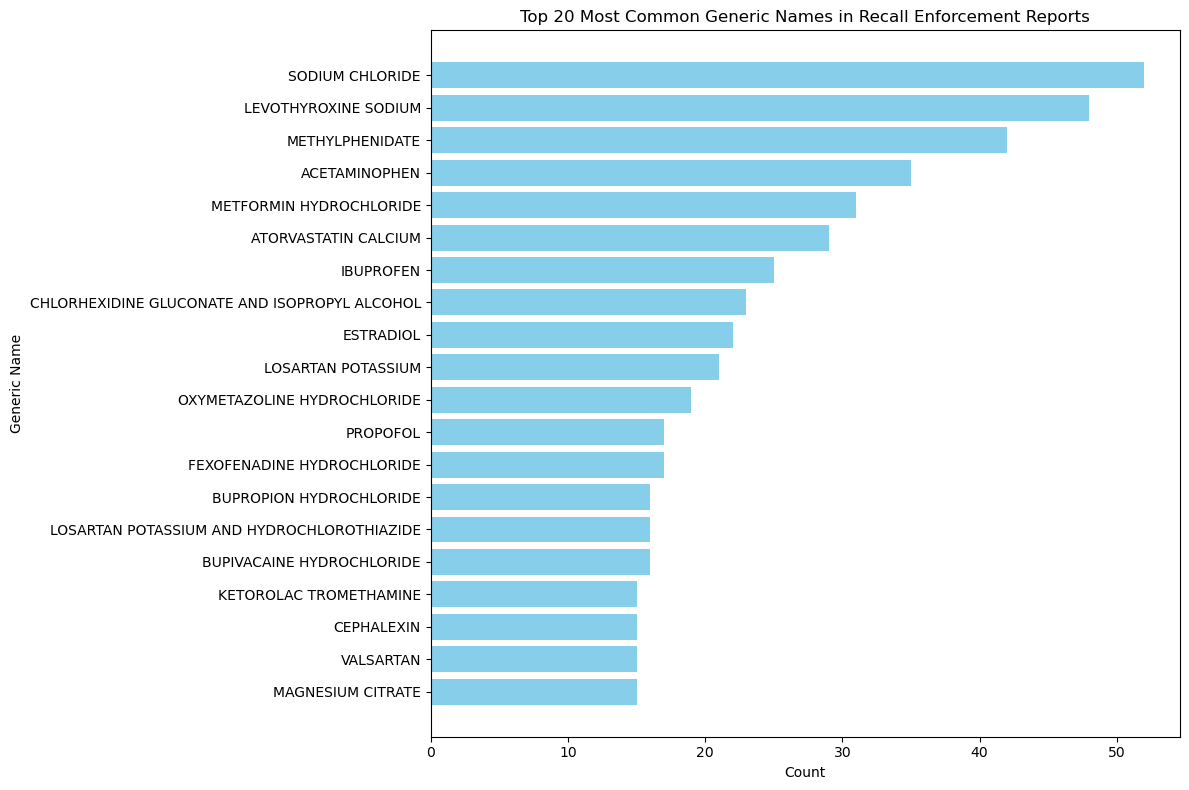

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Take the top 20 most common generic names in enforcement reports
top_20_enforcement_generic_names = grouped_enforcement.head(20)

# Plotting a bar chart for the top 20 most common generic names
plt.figure(figsize=(12, 8))
plt.barh(top_20_enforcement_generic_names["Generic Name"], top_20_enforcement_generic_names["Count"], color="skyblue")
plt.xlabel("Count")
plt.ylabel("Generic Name")
plt.title("Top 20 Most Common Generic Names in Recall Enforcement Reports")
plt.gca().invert_yaxis()  # Highest count at the top

# Display the plot
plt.tight_layout()
plt.show()

In [19]:
# What are the most common generic names in adverse effects reports?
# Top 20 Most Common Generic Names in Adverse Effects Reports, Grouped and Sorted by Frequency

# Group by 'Generic_Name' and count for df_adverse_effects, then sort by Count in descending order
grouped_adverse_effects = df_adverse_effects.groupby("Generic Name").size().reset_index(name="Count")
grouped_adverse_effects = grouped_adverse_effects.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display 
grouped_adverse_effects.head(20)

,Generic Name,Count
0,AMBRISENTAN,1674
1,ATORVASTATIN CALCIUM,1590
2,RUXOLITINIB,1270
3,DIMETHYL FUMARATE,614
4,NATALIZUMAB,548
5,CETUXIMAB,537
6,INTERFERON BETA-1A,473
7,LEVONORGESTREL,441
8,PREGABALIN,339
9,ADALIMUMAB,315


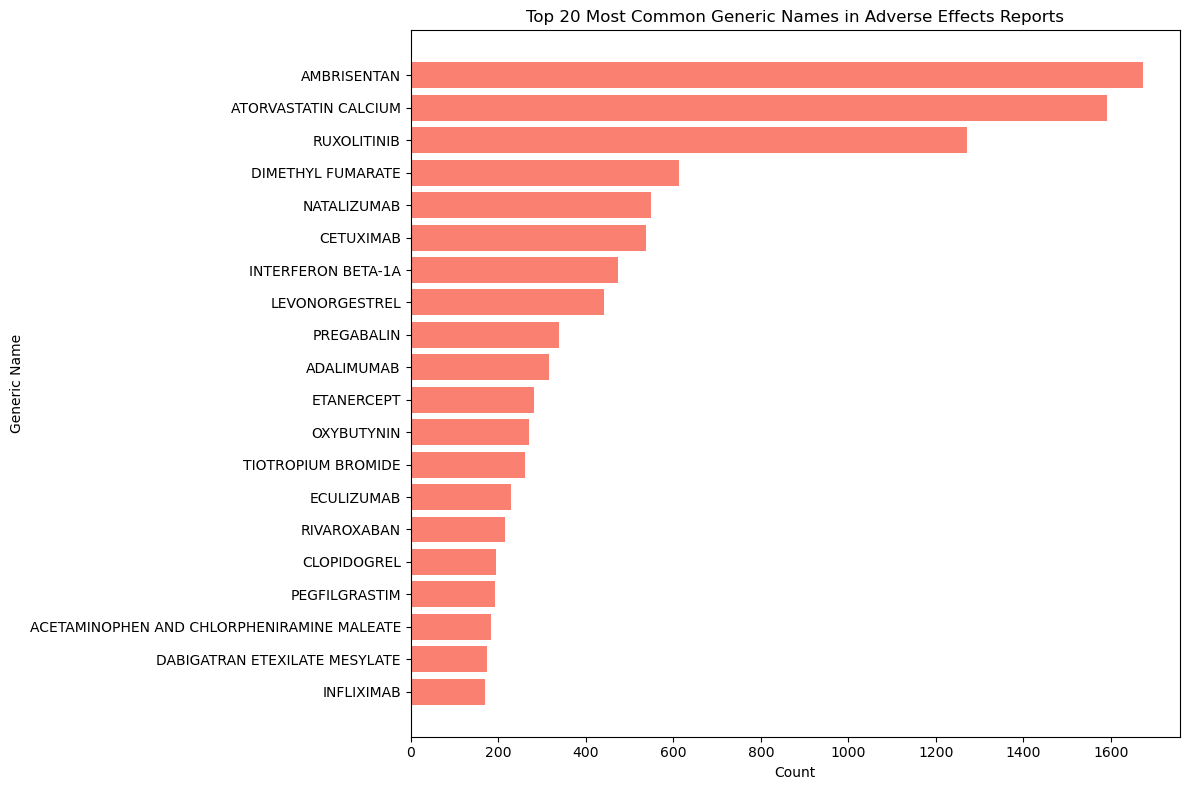

In [20]:
# Bar graph for the above Drugs
# Take the top 20 most common generic names in adverse effects reports
top_20_adverse_effects_generic_names = grouped_adverse_effects.head(20)

# Plotting a bar chart for the top 20 most common generic names in adverse effects reports
plt.figure(figsize=(12, 8))
plt.barh(top_20_adverse_effects_generic_names["Generic Name"], top_20_adverse_effects_generic_names["Count"], color="salmon")
plt.xlabel("Count")
plt.ylabel("Generic Name")
plt.title("Top 20 Most Common Generic Names in Adverse Effects Reports")
plt.gca().invert_yaxis()  # Highest count at the top

# Display the plot
plt.tight_layout()
plt.show()


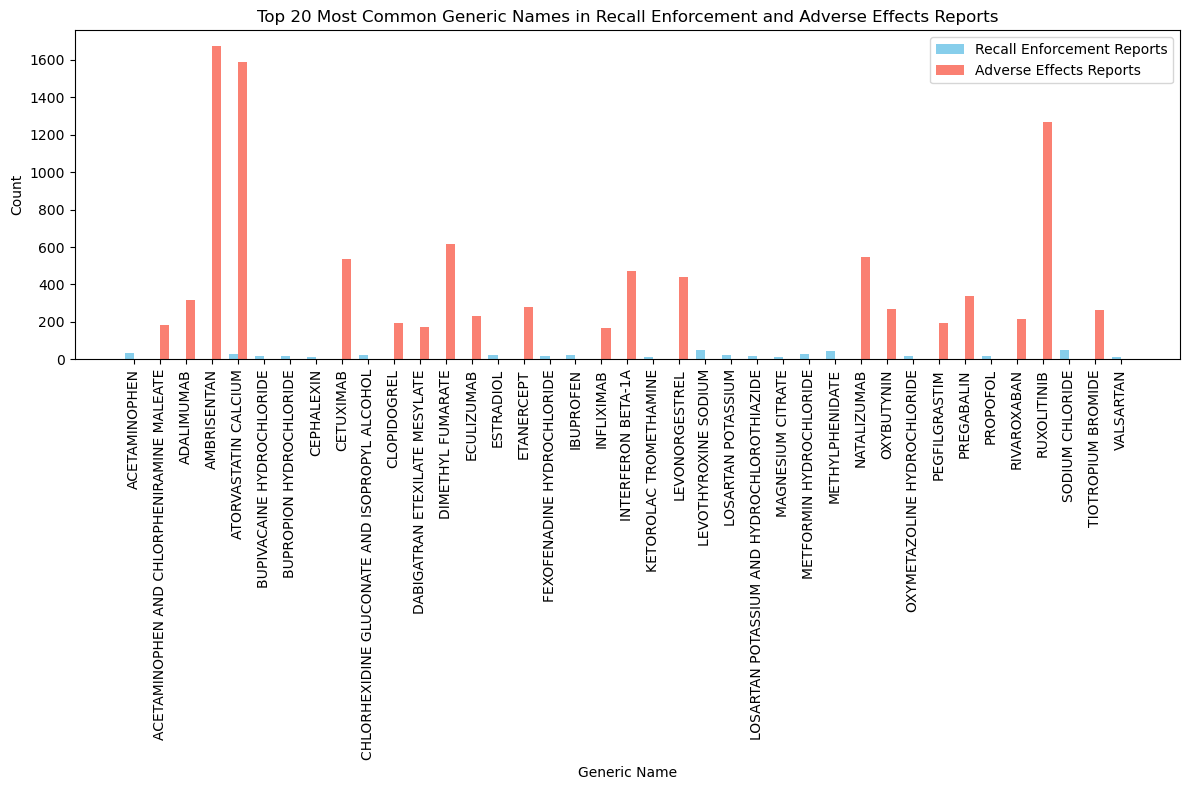

In [21]:
# Selecting top 20 most common generic names from each DataFrame
top_20_enforcement = grouped_enforcement.head(20)
top_20_adverse_effects = grouped_adverse_effects.head(20)

# Merge the two DataFrames on 'Generic Name' to ensure we’re comparing the same names
merged_df = top_20_enforcement.merge(top_20_adverse_effects, on="Generic Name", how="outer", suffixes=('_enforcement', '_adverse'))
merged_df.fillna(0, inplace=True)  # Fill missing values with 0 for any Generic Names not in both sets

# Define the positions and width for the bars
x = np.arange(len(merged_df["Generic Name"]))  # the label locations
width = 0.35  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(x - width/2, merged_df["Count_enforcement"], width, label="Recall Enforcement Reports", color='skyblue')
bar2 = ax.bar(x + width/2, merged_df["Count_adverse"], width, label="Adverse Effects Reports", color='salmon')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel("Generic Name")
ax.set_ylabel("Count")
ax.set_title("Top 20 Most Common Generic Names in Recall Enforcement and Adverse Effects Reports")
ax.set_xticks(x)
ax.set_xticklabels(merged_df["Generic Name"], rotation=90)
ax.legend()

# Display the plot with tight layout
plt.tight_layout()
plt.show()


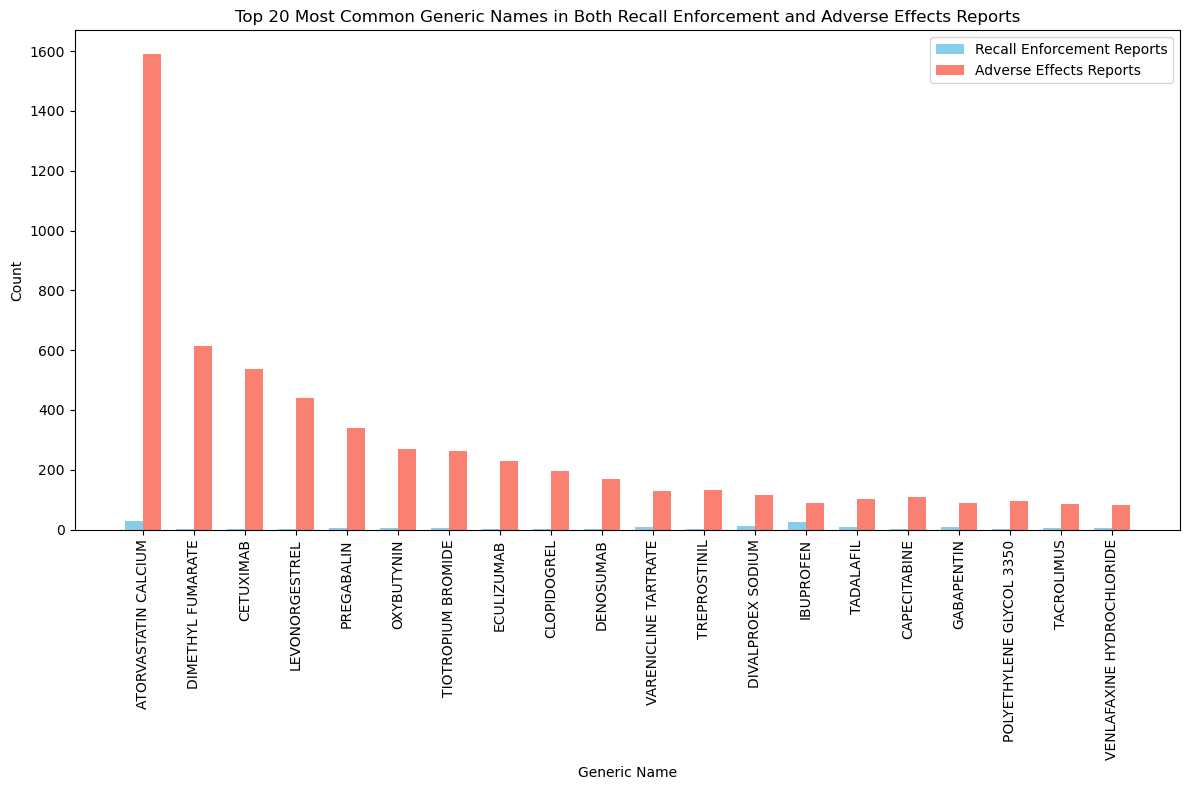

In [22]:
# Most Common Generic Names Shared Across Enforcement and Adverse Effects Reports
# Top 20 Common Generic Names with Frequency Comparison in Both Datasets

# Find common generic names between the two DataFrames and select the top 20 based on combined counts
common_names = grouped_enforcement.merge(grouped_adverse_effects, on="Generic Name", suffixes=('_enforcement', '_adverse'))
common_names["Total_Count"] = common_names["Count_enforcement"] + common_names["Count_adverse"]
top_common_names = common_names.nlargest(20, "Total_Count")

# Define the positions and width for the bars
x = np.arange(len(top_common_names["Generic Name"]))  # the label locations
width = 0.35  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(x - width/2, top_common_names["Count_enforcement"], width, label="Recall Enforcement Reports", color='skyblue')
bar2 = ax.bar(x + width/2, top_common_names["Count_adverse"], width, label="Adverse Effects Reports", color='salmon')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel("Generic Name")
ax.set_ylabel("Count")
ax.set_title("Top 20 Most Common Generic Names in Both Recall Enforcement and Adverse Effects Reports")
ax.set_xticks(x)
ax.set_xticklabels(top_common_names["Generic Name"], rotation=90)
ax.legend()

# Display the plot with tight layout
plt.tight_layout()
plt.show()


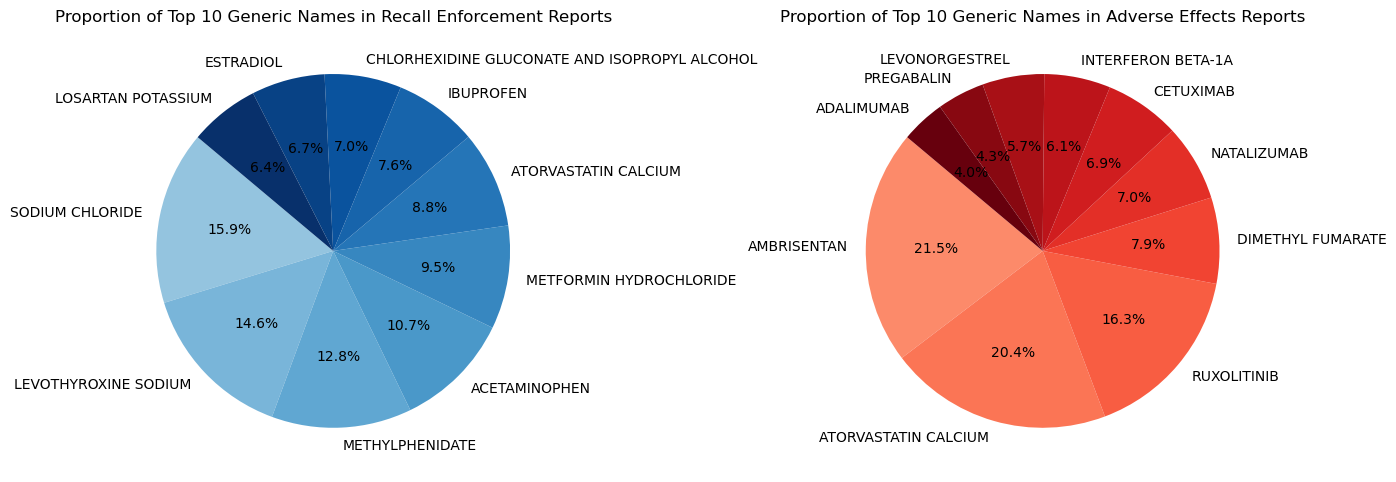

In [23]:
# Proportion of Top 10 Generic Names in FDA Enforcement and Adverse Effects Reports
# Pie Charts Showing Contribution of Most Frequent Generic Names in Each Report Type

# Selecting the top 10 generic names from each DataFrame
top_10_enforcement = grouped_enforcement.head(10)
top_10_adverse_effects = grouped_adverse_effects.head(10)

# Setting up the figure and axis for two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for enforcement reports
ax1.pie(top_10_enforcement["Count"], labels=top_10_enforcement["Generic Name"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Blues(np.linspace(0.4, 1, 10)))
ax1.set_title("Proportion of Top 10 Generic Names in Recall Enforcement Reports")

# Pie chart for adverse effects reports
ax2.pie(top_10_adverse_effects["Count"], labels=top_10_adverse_effects["Generic Name"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Reds(np.linspace(0.4, 1, 10)))
ax2.set_title("Proportion of Top 10 Generic Names in Adverse Effects Reports")

# Display the pie charts with a tight layout
plt.tight_layout()
plt.show()


In [24]:
# Filter df_adverse_effects for death-related records
death_related_adverse_effects = df_adverse_effects[df_adverse_effects["Death"] == 1]

# Get unique Generic Names linked to deaths in df_adverse_effects
death_related_generic_names = set(death_related_adverse_effects["Generic Name"].dropna().unique())

# Get unique Generic Names in df_enforcement
enforcement_generic_names = set(df_enforcement["Generic Name"].dropna().unique())

# Find common Generic Names between death-related adverse effects and enforcement reports
common_death_enforcement_generic_names = death_related_generic_names.intersection(enforcement_generic_names)

# Display the count of overlapping generic names
print("Number of Common Generic Names linked to deaths in both datasets:", len(common_death_enforcement_generic_names))


Number of Common Generic Names linked to deaths in both datasets: 0


C:\Users\salin\AppData\Local\Temp\ipykernel_5092\3026932409.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classification_with_deaths = classification_counts.merge(death_related_counts, left_on="Classification", right_on="Generic Name", how="left").fillna(0)


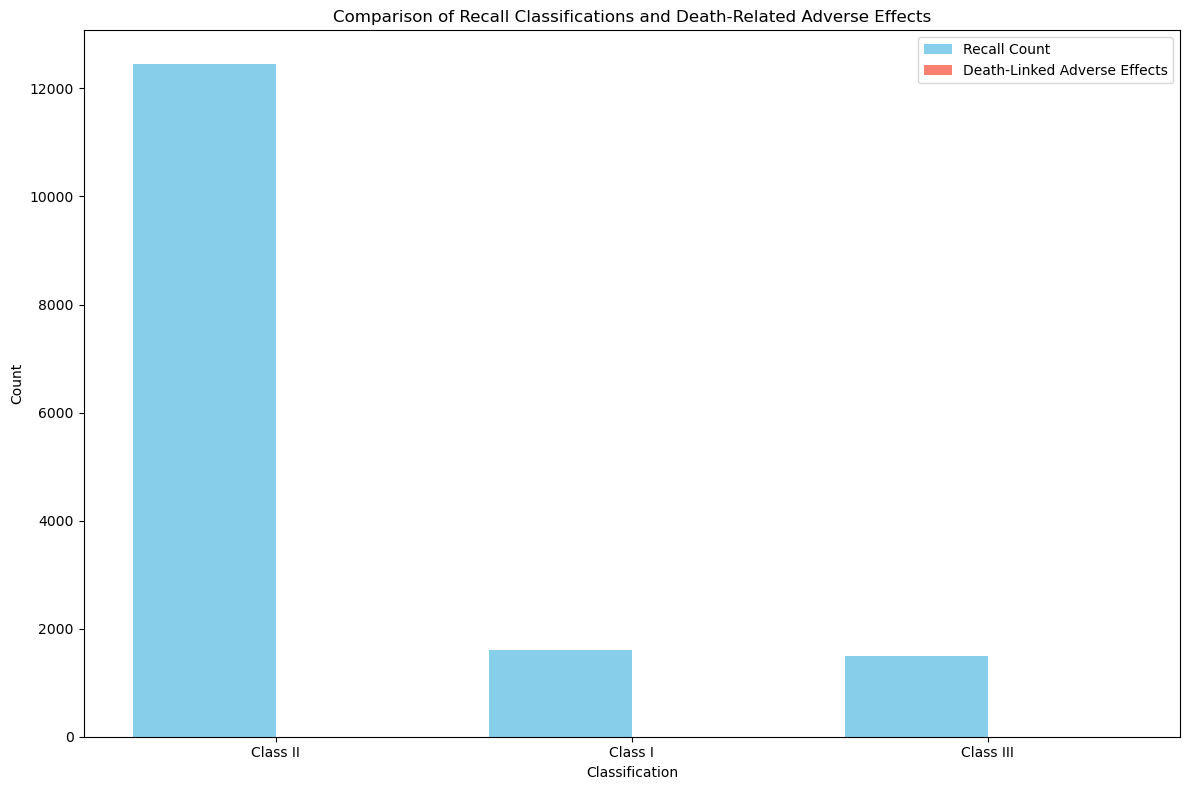

In [ ]:
# Vizualizes the information above (zero deaths in recalls)
# NO RED BAR
# This only accounts for the Generic Name

# Step 1: Count occurrences of each classification type in df_enforcement
classification_counts = df_enforcement["Classification"].value_counts().reset_index()
classification_counts.columns = ["Classification", "Recall_Count"]

# Step 2: Filter df_adverse_effects for death-related records and count by Generic Name
death_related_adverse_effects = df_adverse_effects[df_adverse_effects["Death"] == 1]
death_related_counts = death_related_adverse_effects.groupby("Generic Name").size().reset_index(name="Death_Count")

# Merging both DataFrames to align recall classification with death-related counts
classification_with_deaths = classification_counts.merge(death_related_counts, left_on="Classification", right_on="Generic Name", how="left").fillna(0)

# Plotting side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Define positions and width for the bars
x = np.arange(len(classification_with_deaths["Classification"]))
width = 0.4

# Bar chart for recall counts
recall_bars = ax.bar(x - width/2, classification_with_deaths["Recall_Count"], width, label="Recall Count", color='skyblue')

# Bar chart for death-related adverse effects
death_bars = ax.bar(x + width/2, classification_with_deaths["Death_Count"], width, label="Death-Linked Adverse Effects", color='salmon')

# Adding labels, title, and legend
ax.set_xlabel("Classification")
ax.set_ylabel("Count")
ax.set_title("Comparison of Recall Classifications and Death-Related Adverse Effects")
ax.set_xticks(x)
ax.set_xticklabels(classification_with_deaths["Classification"])
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


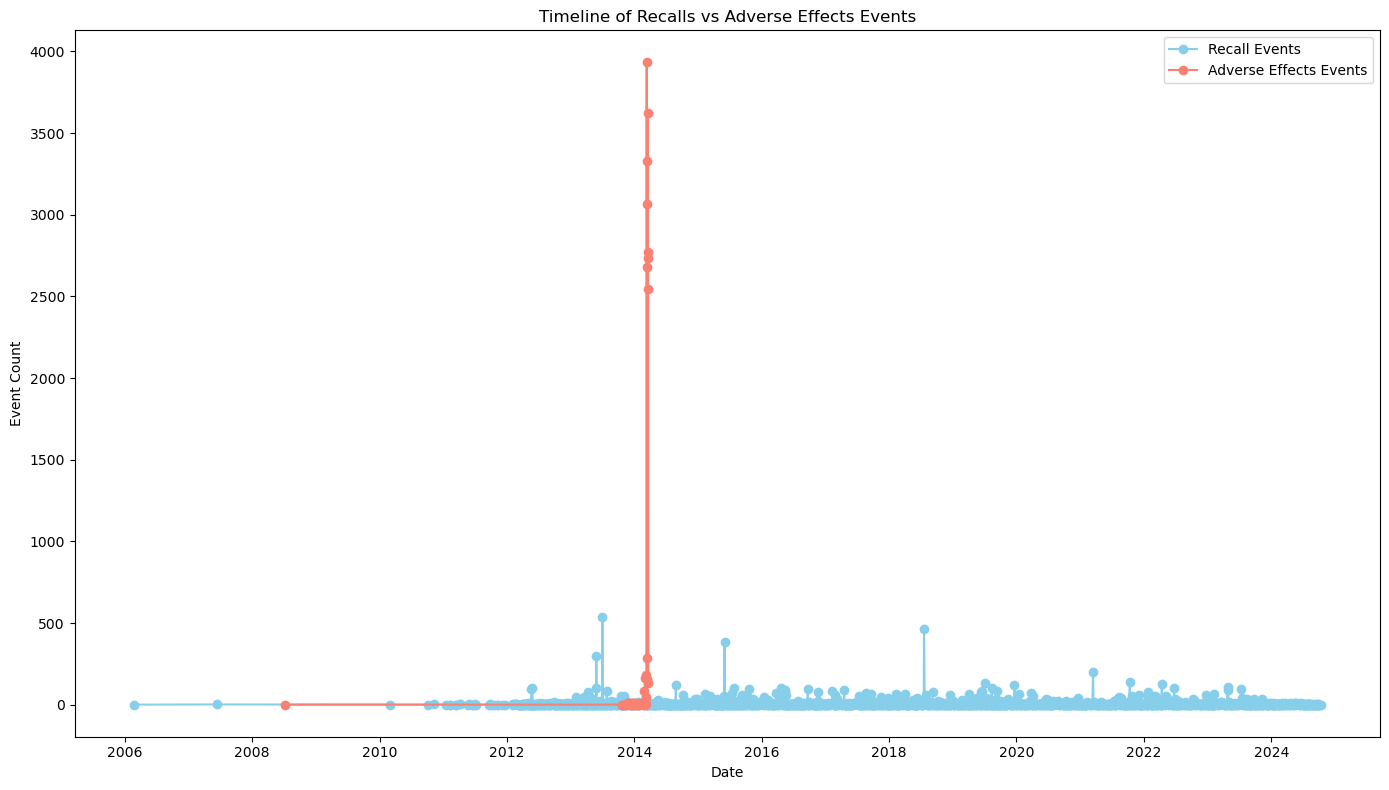

In [ ]:
# Convert 'Recall Initiation Date' and 'Report Date' to datetime if they're not already
df_enforcement['Recall Initiation Date'] = pd.to_datetime(df_enforcement['Recall Initiation Date'], errors='coerce')
df_adverse_effects['Report Date'] = pd.to_datetime(df_adverse_effects['Report Date'], errors='coerce')

# Step 1: Group by date and count occurrences in each dataset
recall_timeline = df_enforcement.groupby("Recall Initiation Date").size().reset_index(name="Recall_Count")
adverse_effects_timeline = df_adverse_effects.groupby("Report Date").size().reset_index(name="Adverse_Effects_Count")

# Step 2: Plot timeline with both recalls and adverse effects
plt.figure(figsize=(14, 8))

# Plot recalls over time
plt.plot(recall_timeline["Recall Initiation Date"], recall_timeline["Recall_Count"], label="Recall Events", color="skyblue", marker='o')

# Plot adverse effects over time
plt.plot(adverse_effects_timeline["Report Date"], adverse_effects_timeline["Adverse_Effects_Count"], label="Adverse Effects Events", color="salmon", marker='o')

# Adding labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.title("Timeline of Recalls vs Adverse Effects Events")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

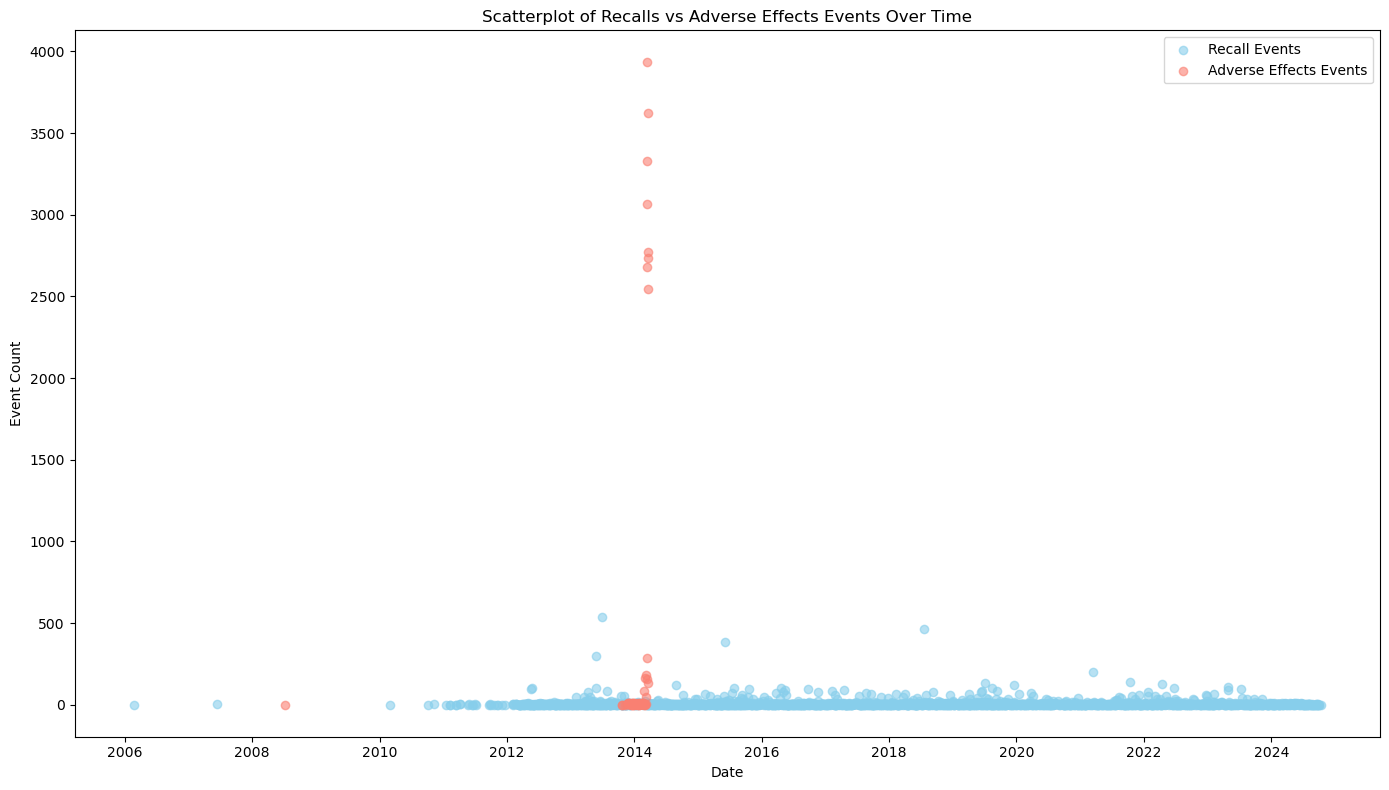

In [ ]:
# Visualization of the amount of Recalls and Adverse Effects by amounts 

# Plot as scatterplot with both recalls and adverse effects
plt.figure(figsize=(14, 8))

# Scatter plot for recalls over time
plt.scatter(recall_timeline["Recall Initiation Date"], recall_timeline["Recall_Count"], label="Recall Events", color="skyblue", alpha=0.6)

# Scatter plot for adverse effects over time
plt.scatter(adverse_effects_timeline["Report Date"], adverse_effects_timeline["Adverse_Effects_Count"], label="Adverse Effects Events", color="salmon", alpha=0.6)

# Adding labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.title("Scatterplot of Recalls vs Adverse Effects Events Over Time")
plt.legend()

# Display the scatter plot
plt.tight_layout()
plt.show()
